In [14]:
import os
os.chdir('C:\\Users\\Admin\\Desktop\\Virtual Internship\\British Airway')

In [15]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [16]:

df= pd.read_excel('BA Reviews.xlsx') 
df.head(5)

,Unnamed: 0,Review,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,0,"Worst experience ever. Outbound flight was cancelled and I was not notified. I was rebooked on a very uncomfortable trip. Inbound flight delayed 1 hour, also not notified. On top of it, they boarded my hand luggage, which was the only bag I had. Extra wait in Milan then. Food is horrible.",NaN,5.0,November 2022,2.0,2.0,2.0,no,Milan to Dallas via London,2.0,Economy Class,Solo Leisure,1.0,2.0
1,1,"Check in was a shambles at BWI, just 3 counters open for a very full flight. The bag drop queue was even longer than the regular check-in queue! Boarding was done by zones so that was carried out reasonably well. Once on board, the FAs were fine, not as engaging on my outbound flight to IAD. The aircraft was cramped and the seats in economy were horrible. I was seated in an aisle seat (row F) where there is an entertainment box taking up a third of your legroom. Overall, very cramped seat, poor legroom and awful IFE screens. The meal was mediocre and there was no bar service before the meal this time. On lading, we were served a hot sandwich which had oozing cheese all over the wrapper so it was not pleasant to handle but tasted very good! The plane landed at a remote stand which meant that we had to be bussed to T5 and since it was raining, it was not a nice experience. Overall, I rate this just as a mediocre journey.",Boeing 787-8,3.0,November 2022,3.0,2.0,1.0,yes,Baltimore to London Heathrow,1.0,Economy Class,Solo Leisure,3.0,NaN
2,2,Beyond disgusted with the fact that my baggage has yet to be delivered to me after 5 weeks of emails and calls to BA. Two pieces reported 29th September. BA responses are generic non specific and all attempts to speak to a customer service worker are obstructed. All this from an airline touting its values and claiming yo be one of the best in the world. Disgraceful does not fully describe their customer service.,NaN,3.0,October 2022,3.0,1.0,2.0,no,Dubai to Belfast via London,3.0,Business Class,Couple Leisure,1.0,2.0
3,3,"On July 19th 2022 I had submitted a complaint form with regards to the fact that BA had misplaced our luggage during our wedding trip to Italy and we've lost 2 days and incurred additional expenses in retrieving them, for which I had provided all copy of receipts for. I requested for my expenses to be reimbursed, they agreed, I sent all requested information and was told in 2 weeks I will be receiving it. It's 4 months later and British Airways has not processed my reimbursements and stopped answering my follow-ups on the matter.",NaN,5.0,July 2022,NaN,1.0,NaN,no,Dallas to Bologna via London,5.0,Economy Class,Couple Leisure,1.0,NaN
4,4,"I booked the flight on Oct 8, but have to cancel the flight on the same day after learning that I can't get my entry visa in time for the flight. And I did receive a confirmation email says my flight was canceled. But in the cancellation email, the booking reference number is a different one. So I requested cancellation, but BA canceled another person's flight and sent the confirmation to my email? I assumed that my flight was canceled, but after more than 3 weeks, I still have not received any refund, so I reached out, and it turned out my flight is still on?! And it is getting even more ridiculous when you try to reach out to BA. I tried multiple different ways, phone calls, and emails, but none was able to investigate what actually happened nor has the authority help cancel my flight without paying penalty. Based on my experience, no ones reads your email carefully, no matter how much context you put in. Given all I have experienced, I have zero faith in British Airways.",NaN,NaN,October 2022,NaN,1.0,NaN,no,San Francisco to London,NaN,Economy Class,Solo Leisure,1.0,NaN


In [17]:
pd.set_option('display.max_colwidth', None)
df.loc[df["Route"]== 'Singapore to London', 'Review']

147                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [18]:
import nltk
from nltk.tokenize import RegexpTokenizer

tkn = RegexpTokenizer(r'\w+')

df["Review"]= df["Review"].apply(lambda x: tkn.tokenize(x.lower()))
print(df["Review"])


0                                                                                                                                                                                                                                                                                                                                  [worst, experience, ever, outbound, flight, was, cancelled, and, i, was, not, notified, i, was, rebooked, on, a, very, uncomfortable, trip, inbound, flight, delayed, 1, hour, also, not, notified, on, top, of, it, they, boarded, my, hand, luggage, which, was, the, only, bag, i, had, extra, wait, in, milan, then, food, is, horrible]
1                                [check, in, was, a, shambles, at, bwi, just, 3, counters, open, for, a, very, full, flight, the, bag, drop, queue, was, even, longer, than, the, regular, check, in, queue, boarding, was, done, by, zones, so, that, was, carried, out, reasonably, well, once, on, board, the, fas, were, fine, not, as, engaging, on

In [19]:
from nltk.corpus import stopwords
stop_words= stopwords.words("english")
stop_words.extend(['flight', 'ba', 'british', 'airway', 'verified', 'review', "via", "london", "heathrow", "new", "york"])

def RemoveStopWords(review):
    filtered_words = [word for word in review if word not in stop_words]
    return filtered_words
df["Review"]= df["Review"].apply(RemoveStopWords)
print(df["Review"])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              [worst, experience, ever, outbound, cancelled, notified, rebooked, uncomfortable, trip, inbound, delayed, 1, hour, also, notified, top, boarded, hand, luggage, bag, extra, wait, milan, food, horrible]
1                                                                                                                                                          [check, shambles, bwi, 3, counters, open, full, bag, drop, queue, eve

In [30]:
def basic_clean(text):
    ps = nltk.PorterStemmer()
    wnl = nltk.stem.WordNetLemmatizer()
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(ps.stem(word)) for word in words]

def ngrams(sent, n):
    global df
    wordlist= basic_clean(''.join(str(df.loc[(df["Recommended"]== sent), "Review"].tolist())))
    true_bigrams_series = (pd.Series(nltk.ngrams(wordlist, n)).value_counts())[:20]
    return true_bigrams_series


In [32]:
Graph= ngrams('yes', 2)

Text(0.5, 0, '# of Occurances')

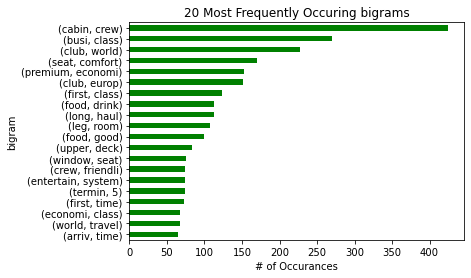

In [33]:
Graph.sort_values().plot.barh(color='green')
plt.title('20 Most Frequently Occuring bigrams')
plt.ylabel('bigram')
plt.xlabel('# of Occurances')

In [34]:
print(true_bigrams_series)

(cabin, crew)          425
(busi, class)          270
(club, world)          227
(seat, comfort)        170
(premium, economi)     153
(club, europ)          151
(first, class)         124
(long, haul)           113
(food, drink)          113
(leg, room)            107
(food, good)            99
(upper, deck)           84
(window, seat)          76
(crew, friendli)        74
(entertain, system)     74
(termin, 5)             74
(first, time)           73
(world, travel)         68
(economi, class)        68
(arriv, time)           65
dtype: int64


<AxesSubplot:ylabel='Seat Type'>

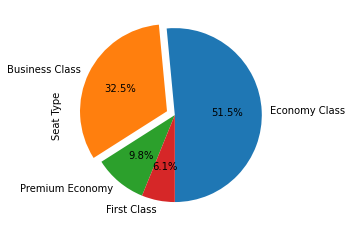

In [35]:
df['Seat Type'].value_counts().plot(kind= 'pie', autopct='%1.1f%%', explode=(0, 0.1, 0, 0), startangle= -90)

Text(0.5, 1.0, 'Sentiment')

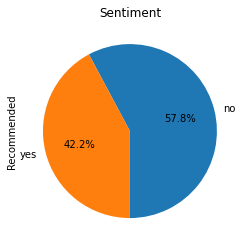

In [36]:
df['Recommended'].value_counts().plot(kind= 'pie', autopct='%1.1f%%', startangle= -90)
plt.title('Sentiment')